I have a plot of L2_a against q, and I want to make a fit so that I can find a formula for L2_a that depends on q. Before I make the fit, I want to do a couple things. First, I want to remove the data points that are messed up, right now I have one point that needs removing. All you have to do for this is make it so that all points where L2_a (y-axis) is smaller than 1 get removed. Also, I want to manually add a point at the coordinate (0.0,1.0). 
My supervisor said if Im gonna make a fit, I need to try to make it so the points of the graph are less spread apart so that the fit is more accurate. 
Im going to send you the code now

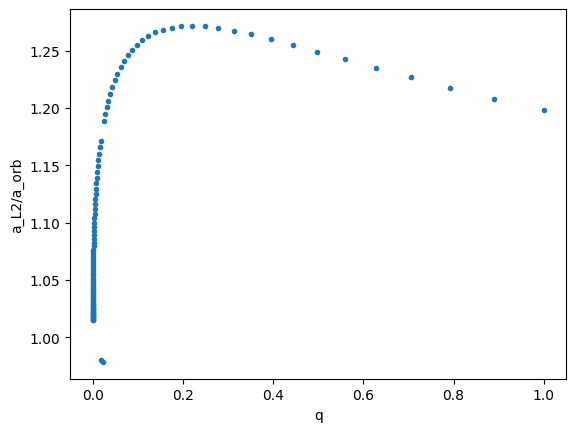

In [41]:
import pandas as pd
import warnings
import numpy as np
# from PyAstronomy import pyasl
from scipy import optimize
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
# inFile = r'DWDs.out'

# df = pd.read_csv(inFile, sep='\s+',header=None)
# col_name = ['m1i','m2i','porbi','beta_mt','kw1f','kw2f','agef','m1f','m2f','porbf','l1','l2','Tm1',
#             'Tm2','gammaEE','count_mt','rli','count_stable1','count_ce1','two','two']
# df.columns = col_name
# #print(df)

# def mod_mestel_cooling(mass,metal,age,baryon):
#     if age < 9.e9:
#         mod_mestel_cooling = (300.e0 * mass * metal**0.4e0) / (baryon * (age + 1.e5)*1.e-6 )**1.18e0
#     else:
#         mod_mestel_cooling = 300.e0 * (9000.1e0 * baryon)**5.3e0 * mass * metal**0.4e0 / (baryon * (age + 1.e5)*1.e-6 )**6.48e0
#     return mod_mestel_cooling



# df['evolve1'] = df.apply(lambda x: mod_mestel_cooling(x['m1f'],0.02,x['Tm1'],16.0),axis=1)
# df['evolve2'] = df.apply(lambda x: mod_mestel_cooling(x['m2f'],0.02,x['Tm2'],16.0),axis=1)


a=np.linspace(1,1,100)
#a=np.arange(100,100,100)
#qe=np.linspace(0.0001,1,100)
q = np.logspace(-5,0,100)
M=5
def L2():
    M1 = M/(1+q)
    M2 = M*q/(q+1)
    a2 = (1/(1+q))*a
    def gradrocheL2(r2):
        gradient = - M1/((a+r2)**2) - M2/r2**2 + M*(a2+r2)/(a**3)
        return gradient
    L2_2 = optimize.newton(gradrocheL2,a/2)
    L2 = L2_2 + a2
    return L2
    
L2_a = L2()/a   
#ratio = L2_a/q 
plt.figure()
plt.plot(q,L2_a,'.',label='a_L2/a_orb as function of q')
plt.xlabel('q')
plt.ylabel(r'a_L2/a_orb')
plt.show()
    


In [103]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [118]:
from sklearn.metrics import mean_squared_error

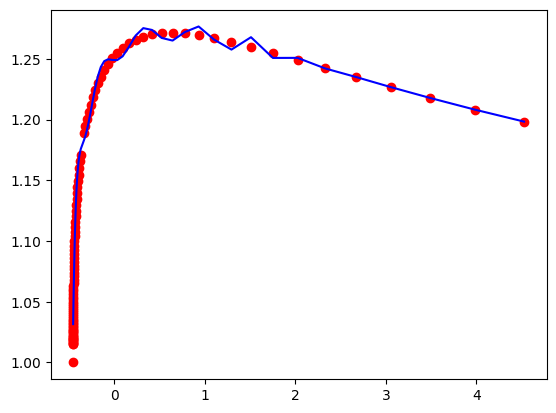

In [132]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X = q
y = L2_a

X1 = [0]
y1 = [1]
for i,j in zip(list(X),list(y)):
    if j>=1:
        X1.append(i)
        y1.append(j)
        

X = np.array(X1).reshape(-1, 1)
y = np.array(y1).reshape(-1, 1)

scale = StandardScaler()
X = scale.fit_transform(X)

poly_reg = PolynomialFeatures(degree = 17)
X_poly = poly_reg.fit_transform(X)
# poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
# pred = lin_reg_2.predict(X_poly)
# mse = mean_squared_error(y,pred)
# print(i,mse)
# MSE_error.append(mse)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
# plt.title('Truth or Bluff (Polynomial Regression)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
plt.show()

In [133]:
# Extract coefficients
coefficients = lin_reg_2.coef_

# Construct polynomial regression formula
formula = 'y = '
for i, coef in enumerate(coefficients[0]):
    formula += f' {coef:.2f} * x^{i} +'
    
formula += f' {lin_reg_2.intercept_[0]:.2f}'

print("Polynomial regression formula:", formula)

Polynomial regression formula: y =  0.00 * x^0 + -0.01 * x^1 + 0.32 * x^2 + 2.76 * x^3 + -11.99 * x^4 + -7.33 * x^5 + 85.95 * x^6 + -103.81 * x^7 + -101.59 * x^8 + 415.15 * x^9 + -543.44 * x^10 + 415.14 * x^11 + -207.33 * x^12 + 69.88 * x^13 + -15.81 * x^14 + 2.30 * x^15 + -0.20 * x^16 + 0.01 * x^17 + 1.25


In [134]:
import sympy as sp

# Define the variables and coefficients
x = sp.Symbol('x')
coefficients = [0.00, 8.23, -150.44, 1531.01, -9099.04, 33053.18, -75438.56, 108430.38, -95125.40, 46468.18, -9677.38, 1.04]

# Construct the polynomial expression
polynomial_expr = sum(coefficients[i] * x**i for i in range(len(coefficients)))

# Print the polynomial expression
print("Polynomial expression:")
print(polynomial_expr)


Polynomial expression:
1.04*x**11 - 9677.38*x**10 + 46468.18*x**9 - 95125.4*x**8 + 108430.38*x**7 - 75438.56*x**6 + 33053.18*x**5 - 9099.04*x**4 + 1531.01*x**3 - 150.44*x**2 + 8.23*x


In [40]:
polynomial_expr

1.04*x**11 - 9677.38*x**10 + 46468.18*x**9 - 95125.4*x**8 + 108430.38*x**7 - 75438.56*x**6 + 33053.18*x**5 - 9099.04*x**4 + 1531.01*x**3 - 150.44*x**2 + 8.23*x

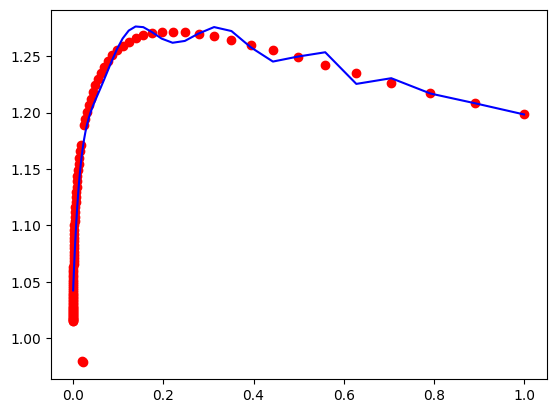

In [20]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
# plt.title('Truth or Bluff (Polynomial Regression)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
plt.show()